In [21]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("data_predicted.csv")

df.head()

,real_min_salary,pred_min_salary,real_max_salary,pred_max_salary
0,45,44.999999,78,78.000001
1,26,26.000000,47,47.000001
2,64,64.000000,113,113.000000
3,97,96.999999,129,129.000000
4,37,37.000000,68,68.000000


In [23]:
real_min_salary = df["real_min_salary"]
real_max_salary = df["real_max_salary"]
pred_min_salary = df["pred_min_salary"]
pred_max_salary = df["pred_max_salary"]

In [24]:
# MAE, RMSE, R² para min
mae_min = mean_absolute_error(real_min_salary, pred_min_salary)
rmse_min = np.sqrt(mean_squared_error(real_min_salary, pred_min_salary))
r2_min = r2_score(real_min_salary, pred_min_salary)

print(f"MAE (min): {mae_min:.2f}")
print(f"RMSE (min): {rmse_min:.2f}")
print(f"R² (min): {r2_min:.3f}")

# MAE, RMSE, R² para max
mae_max = mean_absolute_error(real_max_salary, pred_max_salary)
rmse_max = np.sqrt(mean_squared_error(real_max_salary, pred_max_salary))
r2_max = r2_score(real_max_salary, pred_max_salary)

print(f"MAE (max): {mae_max:.2f}")
print(f"RMSE (max): {rmse_max:.2f}")
print(f"R² (max): {r2_max:.3f}")



MAE (min): 0.00
RMSE (min): 0.00
R² (min): 1.000
MAE (max): 0.00
RMSE (max): 0.00
R² (max): 1.000


MAE (Mean Absolute Error) i RMSE (Root Mean Squared Error)

* Tant el MAE com el RMSE són 0.00 tant per al mínim com per al màxim, cosa que indica que les prediccions coincideixen exactament amb els valors reals.

* Això és extremadament poc habitual en problemes reals de regressió, ja que normalment sempre hi ha algun error.

* En aquest cas, els valors de MAE i RMSE mostren que les prediccions del model per als valors mínim i màxim són perfectes.

R² (Coeficient de determinació)

* Els valors de R² són 1.000 tant per al mínim com per al màxim, la qual cosa significa que el model explica totalment la variabilitat de les dades.

* Aquest resultat perfecte és molt poc realista i suggereix que pot haver-hi algun sobreajustament extrem o algun error en el càlcul de les prediccions o de les dades de test.


Tot i que els números indiquen un rendiment perfecte, cal ser crítics: en problemes reals és gairebé impossible obtenir MAE i RMSE exactament zero i R² = 1.

Podria ser que les dades de test coincideixin exactament amb les dades d’entrenament, que les prediccions estiguin codificades manualment, o que hi hagi un error en la preparació de les dades.

És important revisar les dades i el codi abans de concloure que el model té un rendiment “perfecte”.


El model aparentment prediu perfectament, però aquests resultats haurien de ser interpretats amb precaució, ja que són poc realistes i poden indicar algun problema amb les dades o el procés de predicció.


In [25]:
# Error absoluto
print("Anàlisi de l'error del minim salari")
df["abs_error_min"] = abs(real_min_salary - pred_min_salary)

print(df["abs_error_min"].describe())

# Outliers
Q1 = df["abs_error_min"].quantile(0.25)
Q3 = df["abs_error_min"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df["abs_error_min"] > Q3 + 1.5*IQR]

print(f"Nombre d'outliers trobats: {len(outliers)}")


print("Anàlisi de l'error del maxim salari")
df["abs_error_max"] = abs(real_max_salary - pred_max_salary)

print(df["abs_error_max"].describe())

# Outliers
Q1 = df["abs_error_max"].quantile(0.25)
Q3 = df["abs_error_max"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df["abs_error_max"] > Q3 + 1.5*IQR]

print(f"Nombre d'outliers trobats: {len(outliers)}")


Anàlisi de l'error del minim salari
count    6.760000e+02
mean     5.541214e-07
std      5.416279e-07
min      4.966481e-10
25%      1.820514e-07
50%      4.442744e-07
75%      7.380287e-07
max      3.151808e-06
Name: abs_error_min, dtype: float64
Nombre d'outliers trobats: 30
Anàlisi de l'error del maxim salari
count    6.760000e+02
mean     7.460970e-07
std      7.334002e-07
min      3.204732e-09
25%      2.412544e-07
50%      5.276907e-07
75%      9.963301e-07
max      4.235894e-06
Name: abs_error_max, dtype: float64
Nombre d'outliers trobats: 37


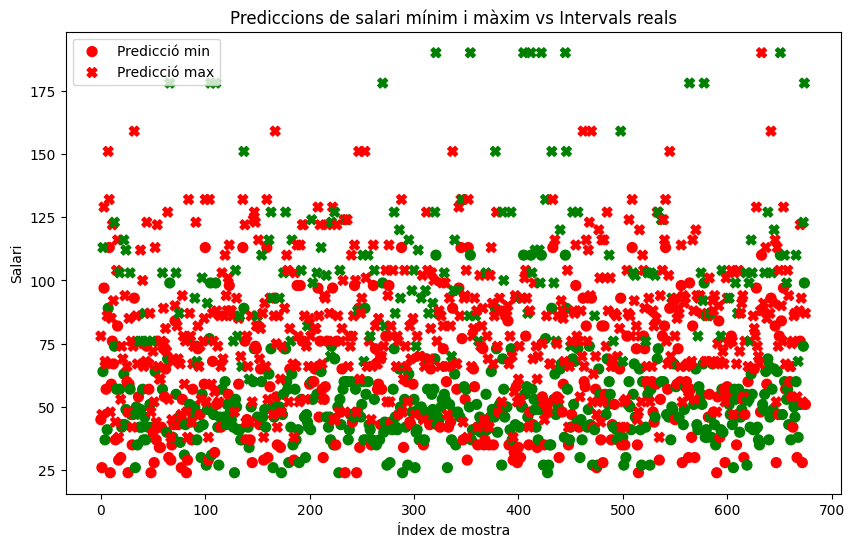

In [26]:
plt.figure(figsize=(10,6))

# Puntos: predicción mínima
plt.scatter(range(len(df)), pred_min_salary, 
            c=['green' if val else 'red' for val in (pred_min_salary >= real_min_salary) & (pred_min_salary <= real_max_salary)],
            s=50, marker='o', label='Predicció min')

# Puntos: predicción máxima
plt.scatter(range(len(df)), pred_max_salary, 
            c=['green' if val else 'red' for val in (pred_max_salary >= real_min_salary) & (pred_max_salary <= real_max_salary)],
            s=50, marker='X', label='Predicció max')

plt.xlabel("Índex de mostra")
plt.ylabel("Salari")
plt.title("Prediccions de salari mínim i màxim vs Intervals reals")
plt.legend()
plt.show()


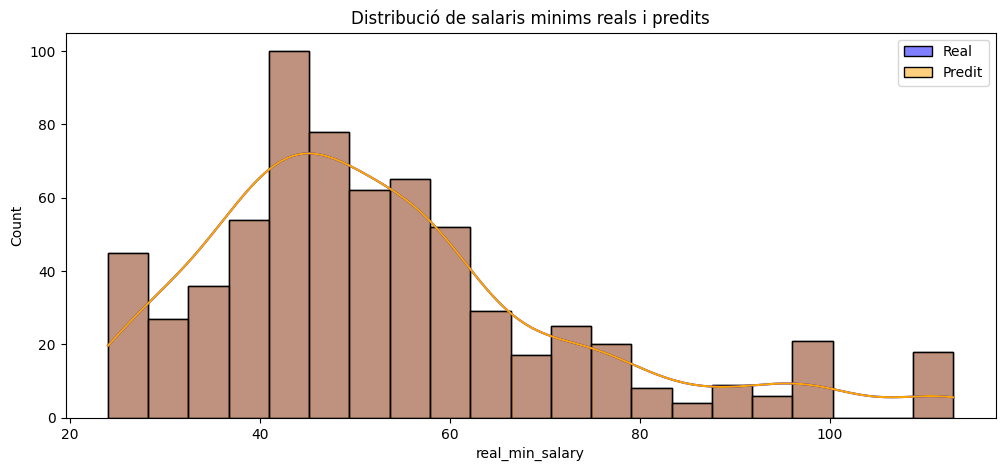

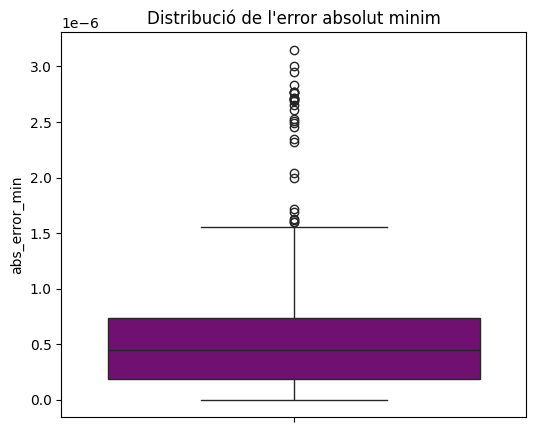

In [29]:
# Histogrames minim
plt.figure(figsize=(12,5))
sns.histplot(real_min_salary, color="blue", label="Real", kde=True, alpha=0.5)
sns.histplot(pred_min_salary, color="orange", label="Predit", kde=True, alpha=0.5)
plt.title("Distribució de salaris minims reals i predits")
plt.legend()
plt.show()

# Boxplot errors
plt.figure(figsize=(6,5))
sns.boxplot(y=df["abs_error_min"], color="purple")
plt.title("Distribució de l'error absolut minim")
plt.show()
